In [69]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from plotnine import *
import requests
from sklearn import preprocessing, linear_model

In [2]:
# !!! WARNING !!!
# THIS FILE RUNS IN /src/pyfiles/ DIRECTORY
# !!! WARNING !!!
if os.getcwd().split('/')[-1] == 'pyfiles':
    os.chdir('../..')
print("Current working directory is: ", os.getcwd())

Current working directory is:  /Volumes/cs-projects/sosc-demographics-ii


In [124]:
sentiment_ngrams = {}
for sentiment in ['positive', 'negative']:
    for source in ["fact", "opinion", "feeling"]:
        sentiment_ngrams[(sentiment, source)] = pd.read_csv(
            os.path.join(
                os.getcwd(),
                "src",
                "common",
                "sentiment",
                "ngrams",
                f"{sentiment}_{source}.csv"
            )
        ).transpose()
        sentiment_ngrams[(sentiment, source)].columns = sentiment_ngrams[(sentiment, source)].iloc[0]
        sentiment_ngrams[(sentiment, source)] = sentiment_ngrams[(sentiment, source)].iloc[1:]
        sentiment_ngrams[(sentiment, source)].index.name = "year"
        sentiment_ngrams[(sentiment, source)].name = f"{sentiment}_{source}"
        sentiment_ngrams[(sentiment, source)] = sentiment_ngrams[(sentiment, source)].rename_axis(None, axis=1)
total_ngrams = 0
for sentiment in ['positive', 'negative']:
    for source in ["fact", "opinion", "feeling"]:
        print("Length of ", sentiment, source, " is: ", len(sentiment_ngrams[(sentiment, source)].columns))
        total_ngrams += len(sentiment_ngrams[(sentiment, source)].columns)
print("Total ngrams: ", total_ngrams)

Length of  positive fact  is:  407
Length of  positive opinion  is:  2597
Length of  positive feeling  is:  463
Length of  negative fact  is:  2965
Length of  negative opinion  is:  5270
Length of  negative feeling  is:  908
Total ngrams:  12610


In [100]:
sentiment_timeseries = {}
for sentiment in ['positive', 'negative']:
    for source in ["fact", "opinion", "feeling"]:
        sentiment_timeseries[(sentiment, source)] = {
            year: 0 for year in range(1985, 2002 + 1)
        }
        src = sentiment_ngrams[(sentiment, source)]          
        dest = sentiment_timeseries[(sentiment, source)]
        for year in range(1985, 2002 + 1):
            dest[year] = src[src.index == str(year)].sum(axis=1).values[0]

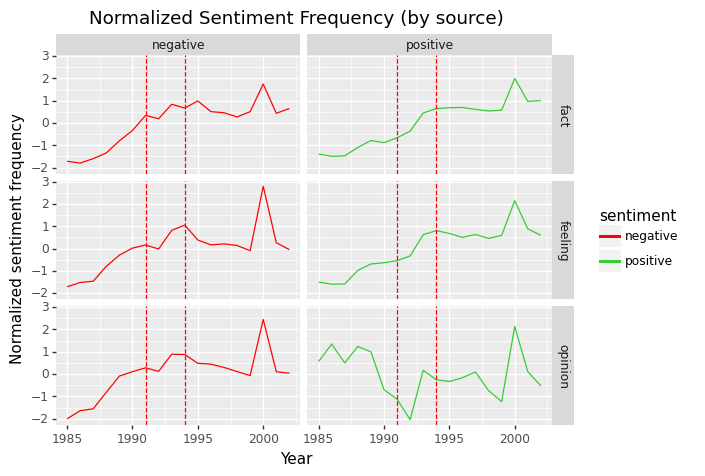

<ggplot: (691855637)>

In [128]:
df = pd.DataFrame(sentiment_timeseries).transpose().reset_index()
df.columns = ["sentiment", "source", *range(1985, 2002 + 1)]
df = df.melt(id_vars=["sentiment", "source"], var_name="year", value_name="count")
df["year"] = df["year"].astype(int)
for source in ["fact", "opinion", "feeling"]:
    for sentiment in ['positive', 'negative']:
        df.loc[
            (df["source"] == source) & (df["sentiment"] == sentiment),
            "count"
        ] = preprocessing.scale(
            df.loc[
                (df["source"] == source) & (df["sentiment"] == sentiment),
                "count"
            ]
        )
# to csv
df.to_csv(
    os.path.join(
        os.getcwd(),
        "src",
        "common",
        "sentiment",
        "parsed",
        "normalized_sentiment_by_source.csv"
    ),
)
# plot
(
    ggplot(df, aes(x="year", y="count", color="sentiment")) +
    geom_line() +
    facet_wrap("source") +
    facet_grid("source ~ sentiment") +
    ggtitle('Normalized Sentiment Frequency (by source)') +
    xlab('Year') +
    ylab('Normalized sentiment frequency') + 
    geom_vline(xintercept=1991, linetype="dashed", color="red") +
    geom_vline(xintercept=1994, linetype="dashed", color="red") +
    scale_color_manual(values=["red", "limegreen"])
)

/var/folders/zz/j6r_jn5d1n33632p2lfxbbgw0000gn/T/ipykernel_95856/243826087.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.


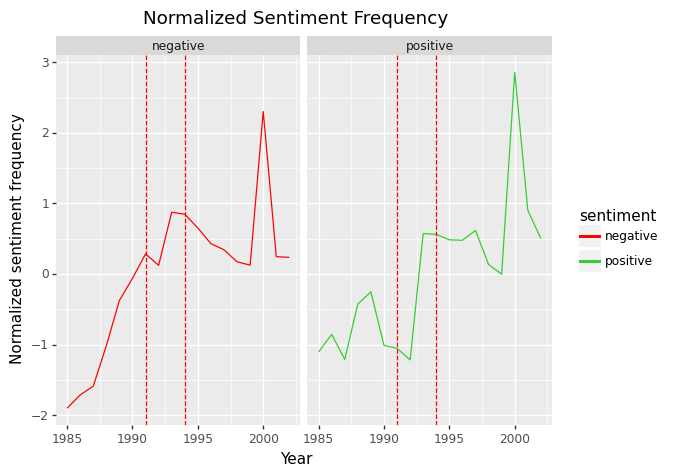

<ggplot: (687782697)>

In [129]:
df = pd.DataFrame(sentiment_timeseries).transpose().reset_index()
df.columns = ["sentiment", "source", *range(1985, 2002 + 1)]
df = df.melt(id_vars=["sentiment", "source"], var_name="year", value_name="count")
df["year"] = df["year"].astype(int)
df = df.groupby(["sentiment", "year"]).sum().reset_index()
for sentiment in ['positive', 'negative']:
    df.loc[
        (df["sentiment"] == sentiment),
        "count"
    ] = preprocessing.scale(
        df.loc[
            (df["sentiment"] == sentiment),
            "count"
        ]
    )
# to csv
df.to_csv(
    os.path.join(
        os.getcwd(),
        "src",
        "common",
        "sentiment",
        "parsed",
        "normalized_sentiment.csv"
    ),
)
(
    ggplot(df, aes(x="year", y="count", color="sentiment")) +
    geom_line() +
    facet_wrap("sentiment") +
    ggtitle('Normalized Sentiment Frequency') +
    xlab('Year') +
    ylab('Normalized sentiment frequency') + 
    geom_vline(xintercept=1991, linetype="dashed", color="red") +
    geom_vline(xintercept=1994, linetype="dashed", color="red") +
    scale_color_manual(values=["red", "limegreen"])
)

/var/folders/zz/j6r_jn5d1n33632p2lfxbbgw0000gn/T/ipykernel_95856/2471071685.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.


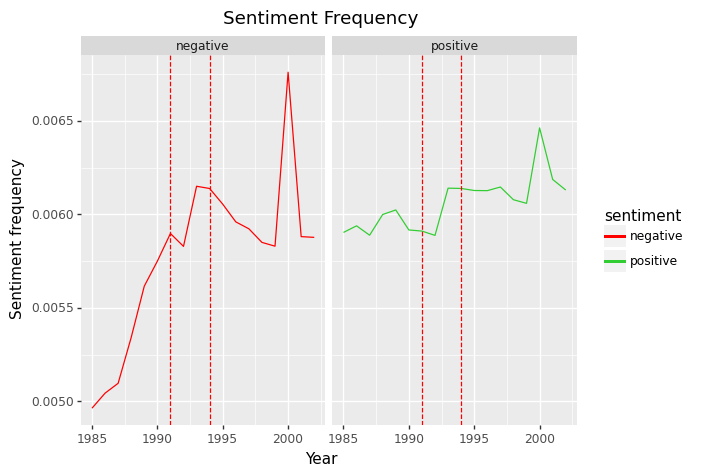

<ggplot: (690881121)>

In [130]:
df = pd.DataFrame(sentiment_timeseries).transpose().reset_index()
df.columns = ["sentiment", "source", *range(1985, 2002 + 1)]
df = df.melt(id_vars=["sentiment", "source"], var_name="year", value_name="count")
df["year"] = df["year"].astype(int)
df = df.groupby(["sentiment", "year"]).sum().reset_index()
# to csv
df.to_csv(
    os.path.join(
        os.getcwd(),
        "src",
        "common",
        "sentiment",
        "parsed",
        "sentiment.csv"
    ),
)
(
    ggplot(df, aes(x="year", y="count", color="sentiment")) +
    geom_line() +
    facet_wrap("sentiment") +
    ggtitle('Sentiment Frequency') +
    xlab('Year') +
    ylab('Sentiment frequency') + 
    geom_vline(xintercept=1991, linetype="dashed", color="red") +
    geom_vline(xintercept=1994, linetype="dashed", color="red") +
    scale_color_manual(values=["red", "limegreen"])
)